In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf ##한글 깨짐 방지

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

# 데이터프레임 / 시리즈
- 작동 방식, 차이
- 데이터 프레임 : 행과 열로 이루어진 표
- 시리즈 : 데이터프레임의 하위 자료형. 딕셔너리 구조와 비슷.
- 1개의 열이 시리즈이고, 이 시리즈가 다수 모여 데이터프레임을 형성하는 것.

# 시리즈(series)
- "pd.Series()"
## 1-1. 딕셔너리, 리스트, 튜플로 생성 가능


In [ ]:
import pandas as pd

In [ ]:
dict_data = {'a':1,'b':2,'c':3}
# list_data = ['2023-0405',3,'abc','100']
# tup_data = ('용근','1995-02-06', '남',True)
series_data = pd.Series(dict_data)
series_data

a    1
b    2
c    3
dtype: int64

In [ ]:
print(series_data.index)
print(series_data.values)

Index(['a', 'b', 'c'], dtype='object')
[1 2 3]


##1-2. 원소선택, 인덱싱
- [위치] 또는 ['인덱스명']
- 두 개 이상의 위치, 이름으로 인덱싱하고 싶을 때는 괄호 두 개 씌워야 함 "[[]]"
- ":" 로 인덱싱 할 때는 대괄호 하나만 필요

In [ ]:
print(series_data[0])
print(series_data['a'])

1
1


In [ ]:
print(series_data[[1,2]])
print(series_data[['b','c']])

b    2
c    3
dtype: int64
b    2
c    3
dtype: int64


In [ ]:
print(series_data[1:3])
print(series_data['b':'c'])

b    2
c    3
dtype: int64
b    2
c    3
dtype: int64


# 데이터프레임(dataframe)
- "pd.DataFrame()"

In [ ]:
df = pd.DataFrame([[14, '남','염경중'],[17,'여','양동중']],
                  index = ['준서','예은'],
                  columns = ['나이','성별','학교'])
df

,나이,성별,학교
준서,14,남,염경중
예은,17,여,양동중


###행, 열 이름 변경
1. df.index = ['','',...] / df.columns = ['','',...]
2. rename() 함수

In [ ]:
df.rename(columns = {'나이':'연령','성별':'남녀','학교':'소속'}, inplace = True) # 열 이름 변경
df.rename(index = {'준서':'학생1','예은':'학생2'}, inplace = True) # 행 이름 변경
df

,연령,남녀,소속
학생1,14,남,염경중
학생2,17,여,양동중


### 행 삭제 : drop() 함수
- 행을 삭제하려면 axis=0 (default), 열을 삭제하려면 axis = 1

In [ ]:
exam_data = {'수학':[90,80,70],'영어':[98,89,95],'음악':[85,95,100],'체육':[100,90,90]}
df = pd.DataFrame(exam_data, index = ['학생1','학생2','학생3'])
df

,수학,영어,음악,체육
학생1,90,98,85,100
학생2,80,89,95,90
학생3,70,95,100,90


In [ ]:
df2 = df.copy()
df2.drop('수학', axis=1, inplace = True) # 두 개의 열을 삭제하고 싶다면 대괄호로 표시 : ['수학','음악']
df2

,영어,음악,체육
학생1,98,85,100
학생2,89,95,90
학생3,95,100,90


### 데이터프레임 인덱싱 : loc, iloc
- loc은 이름으로, iloc은 숫자로 인덱싱
- 각각의 선택은 대괄호 두 개[[]], 범위(:)로 선택은 대괄호 한 개 []

In [ ]:
print(df.loc['학생1'])
print(df.iloc[0])

수학     90
영어     98
음악     85
체육    100
Name: 학생1, dtype: int64
수학     90
영어     98
음악     85
체육    100
Name: 학생1, dtype: int64


In [ ]:
df.iloc[: :2] # 모든 행을 2행 간격으로 선택

,수학,영어,음악,체육
학생1,90,98,85,100
학생3,70,95,100,90


In [ ]:
df.iloc[::-1] # = 역순 정렬

,수학,영어,음악,체육
학생3,70,95,100,90
학생2,80,89,95,90
학생1,90,98,85,100


### 원소 선택
- set_index() : 특정 열을 인덱스로 부여해주는 함수

In [ ]:
exam_data = {'이름':['서준','우현','인아'],
             '수학':[90,80,70],'영어':[98,89,95],'음악':[85,95,100],'체육':[100,90,90]}
df = pd.DataFrame(exam_data)
df.set_index('이름',inplace = True)
df

,수학,영어,음악,체육
이름,,,,
서준,90,98,85,100
우현,80,89,95,90
인아,70,95,100,90


In [ ]:
df.loc['서준','음악'] #하나의 대괄호만 쓰면 해당 원소 하나를 가져올 수 있음

85

In [ ]:
mpg = pd.read_csv('/content/mpg.csv')

In [ ]:
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
229,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
230,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
231,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
232,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


In [ ]:
a = pd.Series(['홍길동',15], index = ['name','age'])
a

name    홍길동
age      15
dtype: object

In [ ]:
print(a.index)
print(a.values)

Index(['name', 'age'], dtype='object')
['홍길동' 15]


In [ ]:
mpg_sp = mpg['model'].drop_duplicates() # drop_duplicates() : 중복제거
mpg_sp

0                          a4
7                  a4 quattro
15                 a6 quattro
18         c1500 suburban 2wd
23                   corvette
28            k1500 tahoe 4wd
32                     malibu
37                caravan 2wd
48          dakota pickup 4wd
57                durango 4wd
64        ram 1500 pickup 4wd
74             expedition 2wd
77               explorer 4wd
83            f150 pickup 4wd
90                    mustang
99                      civic
108                    sonata
115                   tiburon
122        grand cherokee 4wd
130               range rover
134             navigator 2wd
137           mountaineer 4wd
141                    altima
147                    maxima
150            pathfinder 4wd
154                grand prix
159              forester awd
165               impreza awd
173               4runner 4wd
179                     camry
186              camry solara
193                   corolla
198    land cruiser wagon 4wd
200       

In [ ]:
mpg_sp_lst = list(mpg_sp.values)
mpg_sp_lst # 리스트 형태로 변환
for i in mpg_sp_lst:
  print(i)

a4
a4 quattro
a6 quattro
c1500 suburban 2wd
corvette
k1500 tahoe 4wd
malibu
caravan 2wd
dakota pickup 4wd
durango 4wd
ram 1500 pickup 4wd
expedition 2wd
explorer 4wd
f150 pickup 4wd
mustang
civic
sonata
tiburon
grand cherokee 4wd
range rover
navigator 2wd
mountaineer 4wd
altima
maxima
pathfinder 4wd
grand prix
forester awd
impreza awd
4runner 4wd
camry
camry solara
corolla
land cruiser wagon 4wd
toyota tacoma 4wd
gti
jetta
new beetle
passat


## Series의 연산
- 다양한 연산 가능
- DataFrame은 바로 값을 계산하는 데 한계가 있는데 시리즈는 자유자재로 array 계산, 브로드캐스팅이 가능

In [ ]:
mpg.cty.mean() #mpg.cty = series

16.858974358974358

In [ ]:
mpg.cty.mean()*mpg.hwy.mean() # 코드 한 줄로 간편하게 계산 가능

395.17724085031773

In [ ]:
mpg.cty + mpg.hwy

0      47
1      50
2      51
3      51
4      42
       ..
229    47
230    50
231    42
232    44
233    43
Length: 234, dtype: int64

In [ ]:
mpg.cty.sort_index(ascending = False) # 인덱스 기반 내림차순

233    17
232    18
231    16
230    21
229    19
       ..
4      16
3      21
2      20
1      21
0      18
Name: cty, Length: 234, dtype: int64

In [ ]:
mpg.cty.dtype # 데이터 타입 확인 가능

dtype('int64')

## 데이터프레임
- 불린을 통해(참, 거짓) 값을 추출할 수 있음

In [ ]:
mpg[mpg['cty'] > mpg['cty'].mean()] # 참이 되는 값만 추출 가능

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,manual(m5),f,18,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
228,volkswagen,passat,1.8,1999,4,auto(l5),f,18,29,p,midsize
229,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
230,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
232,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


In [ ]:
mpg.columns # 컬럼만 추출

Index(['manufacturer', 'model', 'displ', 'year', 'cyl', 'trans', 'drv', 'cty',
       'hwy', 'fl', 'category'],
      dtype='object')

In [ ]:
a = list(mpg.columns)
print(a)

['manufacturer', 'model', 'displ', 'year', 'cyl', 'trans', 'drv', 'cty', 'hwy', 'fl', 'category']


In [ ]:
for i in a:
  print(mpg[i])

0            audi
1            audi
2            audi
3            audi
4            audi
          ...    
229    volkswagen
230    volkswagen
231    volkswagen
232    volkswagen
233    volkswagen
Name: manufacturer, Length: 234, dtype: object
0          a4
1          a4
2          a4
3          a4
4          a4
        ...  
229    passat
230    passat
231    passat
232    passat
233    passat
Name: model, Length: 234, dtype: object
0      1.8
1      1.8
2      2.0
3      2.0
4      2.8
      ... 
229    2.0
230    2.0
231    2.8
232    2.8
233    3.6
Name: displ, Length: 234, dtype: float64
0      1999
1      1999
2      2008
3      2008
4      1999
       ... 
229    2008
230    2008
231    1999
232    1999
233    2008
Name: year, Length: 234, dtype: int64
0      4
1      4
2      4
3      4
4      6
      ..
229    4
230    4
231    6
232    6
233    6
Name: cyl, Length: 234, dtype: int64
0        auto(l5)
1      manual(m5)
2      manual(m6)
3        auto(av)
4        auto(l5)
   

## 시각화
- 시각화 하는 이유 : 패턴, 경향, 설명, 분석의 시작
- 주장을 더 단단하게 만들기 위한 것
- 분석에 대한 근거를 쉽고 빠르게 이해시키기 위함
- 데이터 type에 따라 그릴 수 있는 그래프 다양 -> 타입 보고 그래프 형태 결정

In [ ]:
import matplotlib.pyplot as plt
# %matplotlib inline # 매직커맨드 : show 함수 사용하지 않아도 바로 그래프가 나오는 것
import numpy as np
plt.rc('font', family='NanumBarunGothic') #한글 깨짐 방지 글꼴 설정

### 산점도
- plt.scatter(x, y, s=area, c=colors)
- 비지도학습시 군집간의 관계, 차원 축소해서 해당 군집이 어떤 식으로 형성되어 있나 볼 때 많이 사용.

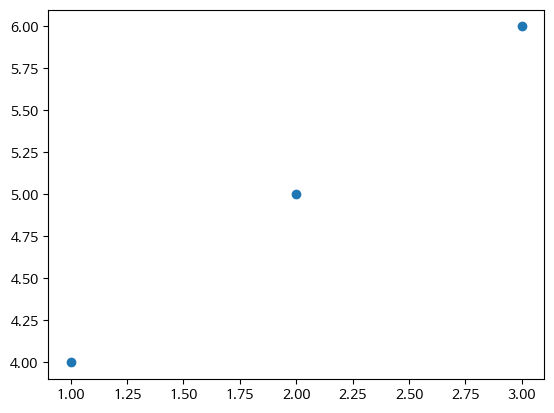

In [ ]:
plt.scatter([1,2,3],[4,5,6])
plt.show()

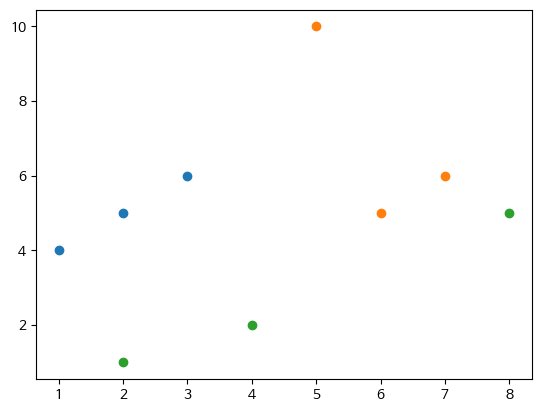

In [ ]:
plt.scatter([1,2,3],[4,5,6])
plt.scatter([5,6,7],[10,5,6])
plt.scatter([2,4,8],[1,2,5])
plt.show() # 두 개를 그리면 자동으로 합쳐짐

- 축, 이름, 범위 설정

Text(0, 0.5, 'y축')

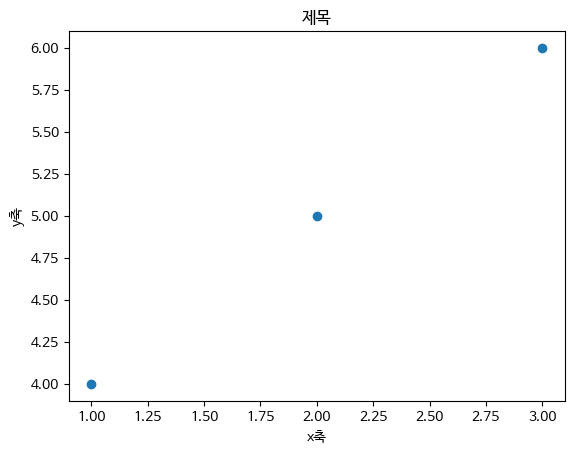

In [ ]:
plt.scatter([1,2,3],[4,5,6])
plt.title('제목')
plt.xlabel('x축')
plt.ylabel('y축')

(30.0, 50.0)

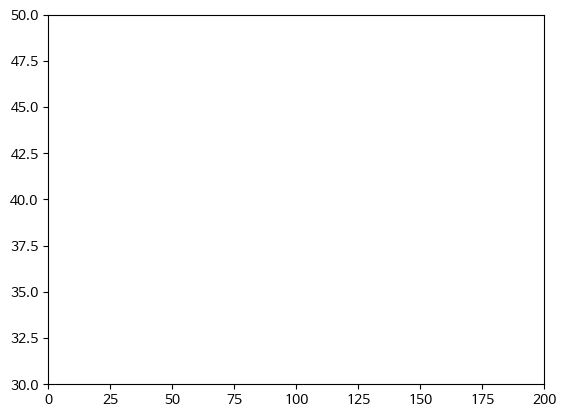

In [ ]:
plt.scatter([1,2,3],[4,5,6])
plt.xlim(0,200)
plt.ylim(30,50)
plt.show()

### 눈금값 및 범례 조절
- xticks, yticks => x축, y축에 눈금 표시
- 그래프에 범례 추가할 때는 legend 함수 사용

([<matplotlib.axis.XTick at 0x7f5d827f3b50>,
 [Text(1, 0, 'A'), Text(2, 0, 'B'), Text(3, 0, 'C')])

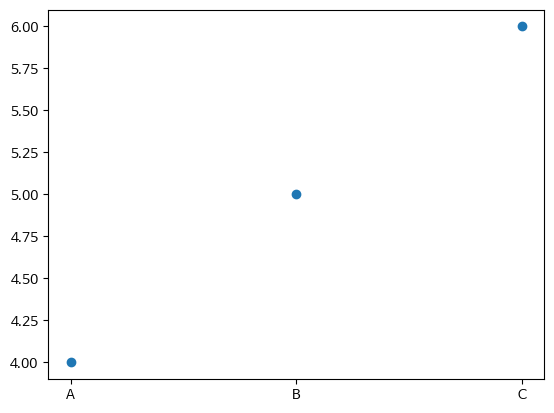

In [ ]:
plt.scatter([1,2,3],[4,5,6])
plt.xticks([1,2,3],['A','B','C'])

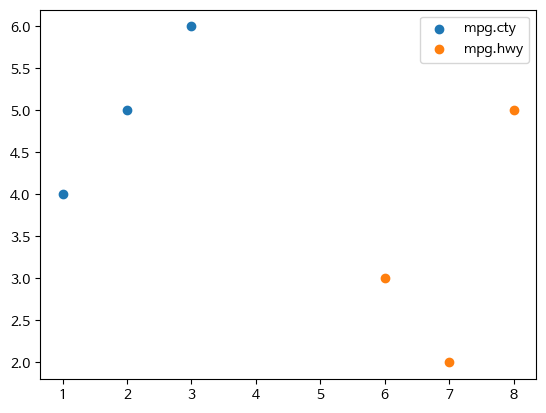

In [ ]:
plt.scatter([1,2,3],[4,5,6], label = 'mpg.cty')
plt.scatter([6,7,8],[3,2,5], label = 'mpg.hwy')
plt.legend(loc = 'best')

# 그래프 크기 조절
- figure 함수의 figsize : 도화지의 크기를 만들어 줌 figure(figsize = (x,y))

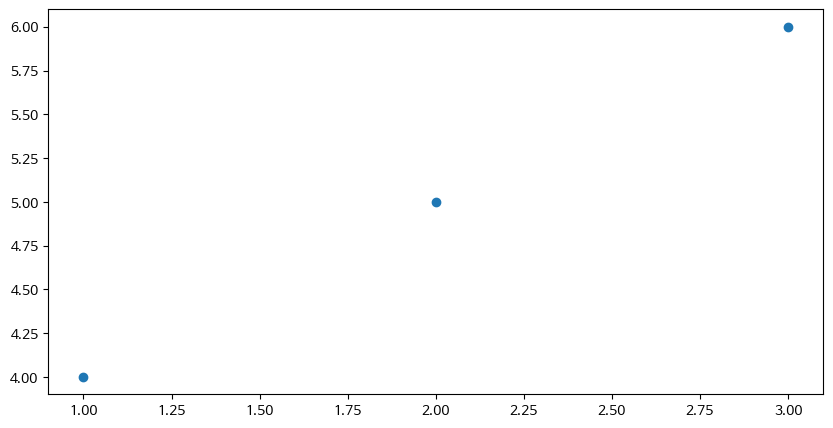

In [ ]:
plt.figure(figsize = (10,5))
plt.scatter([1,2,3],[4,5,6],label = 'mpg.cty')

In [ ]:
import seaborn as sns

# seaborn
- set(style = '')
- style : white, dark, whitegrid, darkgrid, ticks

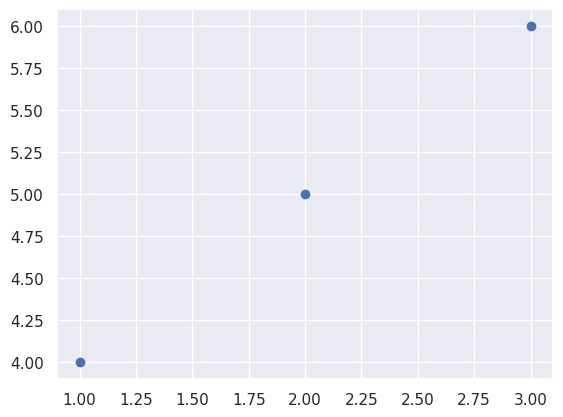

In [ ]:
sns.set() # 기본값이 grid
plt.scatter([1,2,3],[4,5,6])

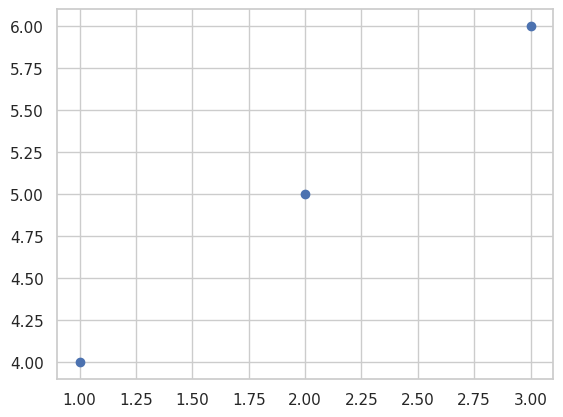

In [ ]:
sns.set(style = 'whitegrid')
plt.scatter([1,2,3],[4,5,6])

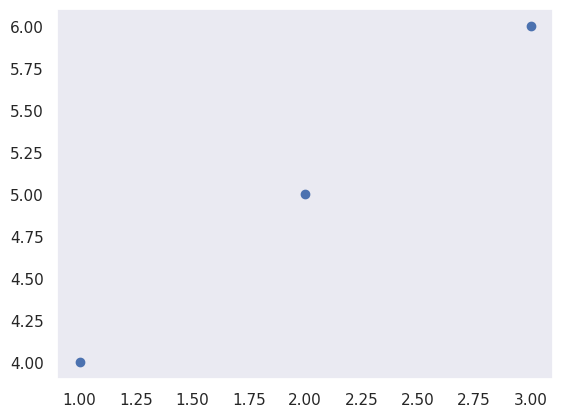

In [ ]:
sns.set(style = 'dark')
plt.scatter([1,2,3],[4,5,6])

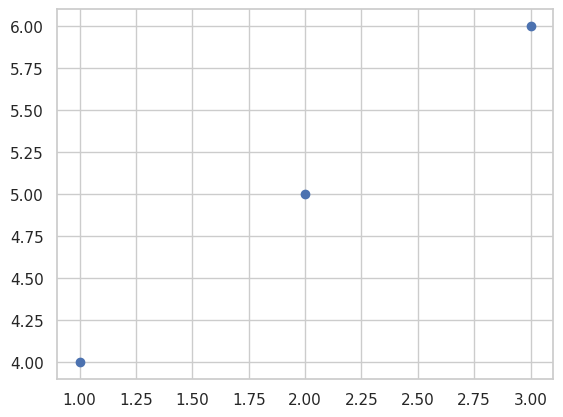

In [ ]:
sns.set(style = 'whitegrid')
plt.scatter([1,2,3],[4,5,6])

# 다양한 그래프 그려보기
- color 설정
- 선 스타일과 두께 설정 (linesytle, linewidth)
- linestyle : dashed, dotted, dashdot, solid 등
- marker 설정 : s, ., 0, *

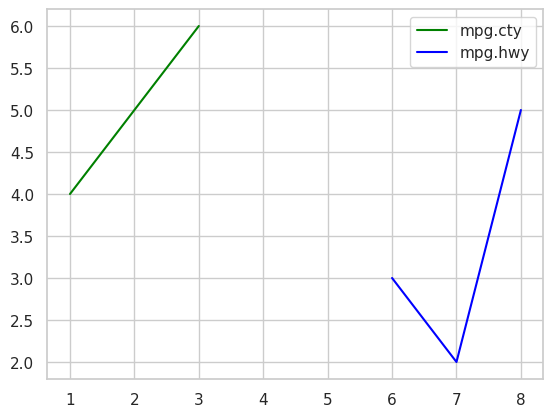

In [ ]:
sns.set(style = 'whitegrid')
plt.plot([1,2,3],[4,5,6], label = 'mpg.cty', color = 'green')
plt.plot([6,7,8],[3,2,5], label = 'mpg.hwy', color = 'blue')
plt.legend(loc = 'best')

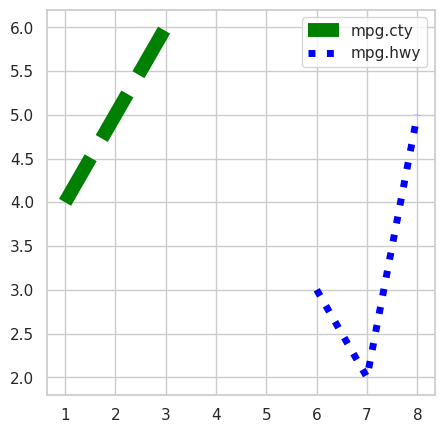

In [ ]:
sns.set(style = 'whitegrid')
plt.figure(figsize = (5,5))
plt.plot([1,2,3],[4,5,6], label = 'mpg.cty', color = 'green', linestyle = 'dashed', linewidth=10)
plt.plot([6,7,8],[3,2,5], label = 'mpg.hwy', color = 'blue', linestyle = 'dotted', linewidth=5)
plt.legend(loc = 'best')

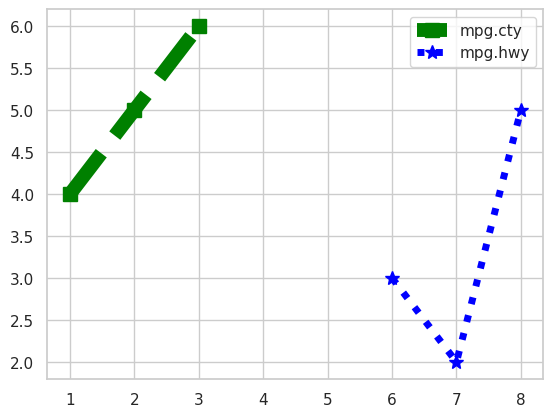

In [ ]:
sns.set(style = 'whitegrid')
plt.plot([1,2,3],[4,5,6],marker = 's', markersize = 10, label = 'mpg.cty', color = 'green', linestyle = 'dashed', linewidth=10)
plt.plot([6,7,8],[3,2,5],marker = '*', markersize = 10, label = 'mpg.hwy', color = 'blue', linestyle = 'dotted', linewidth=5)
plt.legend(loc = 'best')

### 투명도 설정
- alpha

In [ ]:
x = np.random.normal(0,1,5000)
y = np.random.normal(0,1,5000)

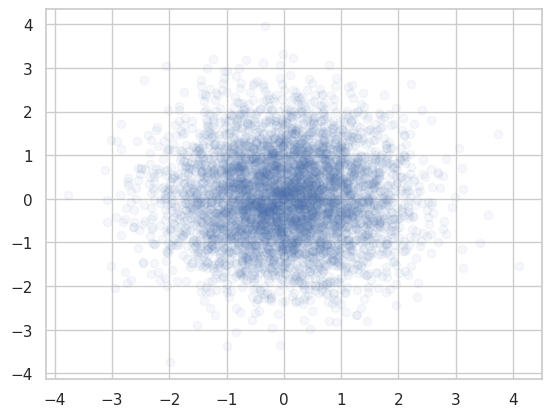

In [ ]:
plt.scatter(x,y, alpha = 0.05)

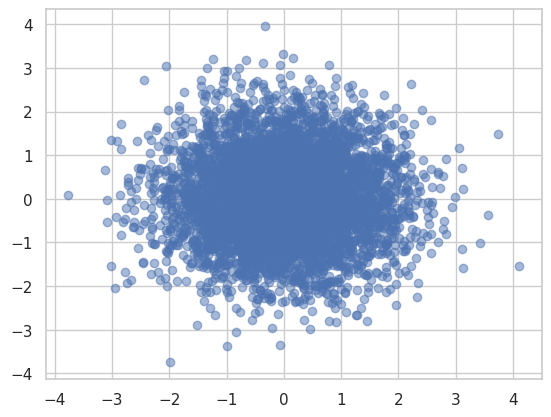

In [ ]:
plt.scatter(x,y, alpha = 0.5)